In [1]:
import numpy as np

# Parameters
Re = 80  # Reynolds number
U = 1.0  # Free stream velocity
D = 1.0  # Cylinder diameter
nu = U * D / Re  # Kinematic viscosity

# Grid setup
nx, ny = 60, 20
x = np.linspace(-5*D, 20*D, nx)
y = np.linspace(-5*D, 5*D, ny)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Time setup
dt = 0.005*2  # Increased time step slightly
t_end = 100
nt = int(t_end / dt)
save_interval = 10

# Initialize velocity fields
u = np.ones((ny, nx)) * U
v = np.zeros((ny, nx))

# Add a small perturbation to trigger instability
v += 0.1 * np.sin(2 * np.pi * X / D) * np.exp(-((X/D)**2 + (Y/D)**2))

# Initialize 3D matrices to store velocities (saving every 100 steps)
u_history = np.zeros((nt // save_interval + 1, ny, nx))
v_history = np.zeros((nt // save_interval + 1, ny, nx))

# Cylinder mask
cylinder = (X**2 + Y**2) <= (D/2)**2

# Helper functions
def upwind_advection(f, u, v):
    fx = np.where(u > 0, f - np.roll(f, 1, axis=1), np.roll(f, -1, axis=1) - f) / dx
    fy = np.where(v > 0, f - np.roll(f, 1, axis=0), np.roll(f, -1, axis=0) - f) / dy
    return u * fx + v * fy

def laplacian(f):
    return (np.roll(f, 1, axis=0) + np.roll(f, -1, axis=0) +
            np.roll(f, 1, axis=1) + np.roll(f, -1, axis=1) - 4*f) / (dx**2)

# Main simulation loop
for t in range(nt):
    # Update velocities
    u_new = u - dt * upwind_advection(u, u, v) + dt * nu * laplacian(u)
    v_new = v - dt * upwind_advection(v, u, v) + dt * nu * laplacian(v)

    # Apply boundary conditions
    u_new[cylinder] = 0
    v_new[cylinder] = 0

    # Enforce inlet and outlet conditions
    u_new[:, 0] = U
    u_new[:, -1] = u_new[:, -2]
    v_new[:, 0] = 0
    v_new[:, -1] = v_new[:, -2]

    # Update velocities
    u, v = u_new, v_new

    # Save velocities to history every 100 steps
    if t % save_interval == 0:
        u_history[t // save_interval] = u
        v_history[t // save_interval] = v

    # Print progress and check for NaN
    if t % 1000 == 0:
        print(f"Time step {t}/{nt} completed")
        if np.isnan(u).any() or np.isnan(v).any():
            print("NaN detected. Stopping simulation.")
            break

# Save velocity histories to files
# np.save('u_history_Re60.npy', u_history)
# np.save('v_history_Re60.npy', v_history)

print("Simulation complete. Velocity histories saved.")


Time step 0/10000 completed
Time step 1000/10000 completed
Time step 2000/10000 completed
Time step 3000/10000 completed
Time step 4000/10000 completed
Time step 5000/10000 completed
Time step 6000/10000 completed
Time step 7000/10000 completed
Time step 8000/10000 completed
Time step 9000/10000 completed
Simulation complete. Velocity histories saved.


In [2]:
print(np.shape(u_history))

(1001, 20, 60)


In [3]:
uhist_reshape = (np.reshape(u_history,[1001, 20*60])).transpose()
[U,S,V] = np.linalg.svd(uhist_reshape)
print(np.shape(U))
print(np.shape(S))
print(np.shape(V))


(1200, 1200)
(1001,)
(1001, 1001)


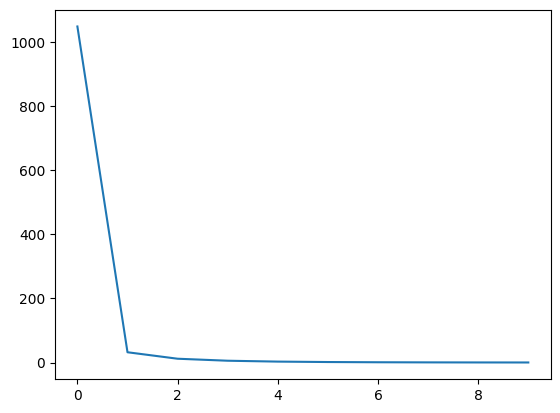

In [5]:
import matplotlib.pyplot as plt
plt.plot(S[0:10])

In [ ]:
plt.contourf(np.reshape(U[:,0],[20,60]))


In [12]:
rank = 10

def reconstruct_image(U,S,Vh,rank):

 im_red_rank = np.zeros([1200,1001])
 for k in range (0, rank):
   im_red_rank = im_red_rank + (U[:,k].reshape([1200,1]))*S[k].reshape([1,1])*Vh[k,:].reshape([1,1001])

 return np.reshape(im_red_rank,[20,60,1001])


In [13]:
uhistory_red_rank = reconstruct_image(U,S,V, rank)

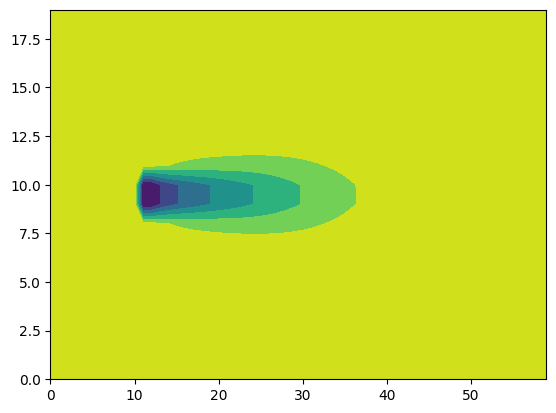

In [14]:
plt.contourf(uhistory_red_rank[:,:,100])

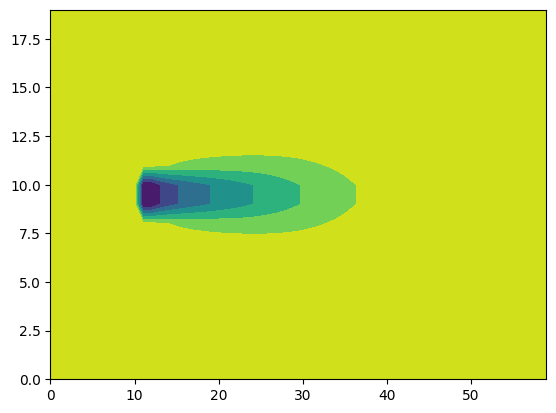

In [15]:
plt.contourf(u_history[100,:,:])